1\. Write a function that converts number representation (bin<->dec<->hex)

In [1]:
def rep(numstr,old,new):
  num=0
  n0,n1,l0,l1=ord('0'),ord('9'),ord('a'),ord('z');
  for i,c in enumerate(reversed(numstr)):
    k=ord(c)
    if n0<=k<=n1:
      k-=n0;
    elif l0<=k<=l1:
      k=k+10-l0;
    num+=k*old**i;
  outstr=''
  #print(num)
  i=0
  while True:
    p=new**i;
    if p > num:
      break;
    s=num%(new**(i+1))//p
    outstr=(chr(n0+s) if s < 10 else chr(l0+s-10))+outstr;
    i+=1;
  return outstr;

print(rep('1101011001',2,10),rep('12389862',10,16))

857 bd0de6


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [2]:
from struct import pack,unpack
def reinterpret_cast(ba32):
  return unpack('f', pack('4s', ba32))[0]
val=51.234;
ba=bytearray(pack('f',val))
print(ba)
print(reinterpret_cast(ba))

bytearray(b'\x9e\xefLB')
51.23400115966797


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [3]:
val=1.0
while True:
  nval=val/2
  if nval==0:
    print(val)
    break
  val=nval
val=1.0
while True:
  nval=val*2
  if str(nval)=='inf':
    print(val)
    break
  val=nval
import sys
print(sys.float_info.min)
print(sys.float_info.max)

5e-324
8.98846567431158e+307
2.2250738585072014e-308
1.7976931348623157e+308


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [6]:
val=1.0
while True:
  nval=val/2
  if 1+nval==1:
    print(val)
    break
  val=nval
  
import numpy as np
print(np.finfo(float).eps)

2.220446049250313e-16
2.220446049250313e-16


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [10]:
from decimal import *

def quadSolve(a,b,c):
  sr=(b*b-4*a*c)**(1/2)
  return ((-b+sr)/(2*a),(-b-sr)/(2*a))
def quadSolve2(a,b,c):
  sr=(b*b-4*a*c)**(1/2)
  return ((2*c)/(-b-sr),(2*c)/(-b+sr))

def quadSolveD(a,b,c):
  sr=(b*b-4*a*c)**(Decimal(0.5))
  return ((-b+sr)/(2*a),(-b-sr)/(2*a))
def quadSolveD2(a,b,c):
  sr=(b*b-4*a*c)**(Decimal(0.5))
  return ((2*c)/(-b-sr),(2*c)/(-b+sr))

def solutionForEverything(a,b,c):
  return (quadSolve2(a,b,c)[0],quadSolve(a,b,c)[1]);

a,b,c=0.001,1000,0.001
res,res2=quadSolve(a,b,c),quadSolve2(a,b,c)
resd,resd2=quadSolveD(Decimal(a),Decimal(b),Decimal(c)),quadSolveD2(Decimal(a),Decimal(b),Decimal(c))
print(res)
print(res2)
print(resd)
print(resd2)

print(res[0]-res2[0],res[1]-res2[1])
print(resd[0]-resd2[0],resd[1]-resd2[1]) # the difference is much smaller


# Problem here: sr=(b*b-4*a*c)**(1/2) is almost b, so (-b+sr) causes precision problems. 
# Solution: By picking only the (-b-sr) part respectively, this issue can be circumvented. 

print(solutionForEverything(a,b,c))


(-9.999894245993346e-07, -999999.999999)
(-1.000000000001e-06, -1000010.5755125057)
(Decimal('-0.000001000000000001000029183318288'), Decimal('-999999.9999989999791833172885'))
(Decimal('-0.000001000000000001000020816683712'), Decimal('-999999.9999989999708166827116'))
1.0575401665491313e-11 10.575513505726121
-8.366634576E-24 -8.3666345769E-12
(-1.000000000001e-06, -999999.999999)


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

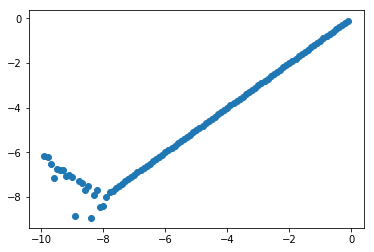

[(-0.1, -0.1), (-0.19999999999999998, -0.19999999999999998), (-0.30000000000000004, -0.30000000000000004), (-0.4, -0.40000000000000063), (-0.5, -0.49999999999999956), (-0.6, -0.6), (-0.7, -0.7), (-0.8, -0.7999999999999979), (-0.9, -0.9), (-1.0, -0.9999999999999958), (-1.1, -1.099999999999995), (-1.2, -1.1999999999999902), (-1.3, -1.3000000000000123), (-1.4, -1.4000000000000201), (-1.5, -1.499999999999953), (-1.6, -1.600000000000075), (-1.7, -1.7000000000001034), (-1.8, -1.8000000000000247), (-1.9, -1.8999999999997594), (-2.0, -1.999999999999961), (-2.1, -2.100000000000587), (-2.2, -2.199999999999385), (-2.3, -2.3000000000013148), (-2.4, -2.39999999999713), (-2.5, -2.500000000003457), (-2.6, -2.599999999993034), (-2.7, -2.7000000000057147), (-2.8, -2.799999999996526), (-2.9, -2.900000000028147), (-3.0, -3.000000000047975), (-3.1, -3.1000000000210193), (-3.2, -3.19999999992124), (-3.3, -3.299999999859471), (-3.4, -3.4000000001541184), (-3.5, -3.49999999964859), (-3.6, -3.6000000005422113

In [12]:
def f(x):
  return x*(x-1);
def df(x):
  return 2*x-1;
def nd(f,x,d):
  return (f(x+d)-f(x))/d;

import matplotlib.pyplot as plt
import numpy as np
import math

xs=list(np.linspace(0,2,1000))
accus=[]
for d in [10**(-e/10) for e in range(1,100)]:
  accus.append((math.log10(d),math.log10(abs(df(1)-nd(f,1,d)))))

plt.scatter(*zip(*accus))
plt.show()
print(accus)

# The accuracy scales linearly with the step delta. For very small delta around 10^-8 the machine precision of float introduces an error.

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


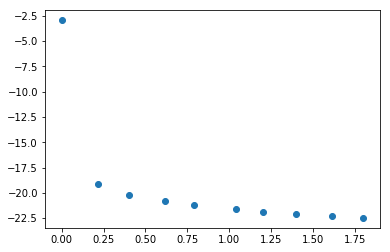

In [14]:
import time
analytic=math.pi/2
perfs=[]
for N in range(10, 5000000, 500000):
  I=0
  t0=time.perf_counter()
  for k in range(N):
    x=-1+2*k/N
    I+=(1-x*x)**(1/2)
  I*=(2/N)
  t1=time.perf_counter()
  perfs.append(((t1-t0),math.log(abs(analytic-I))))

import matplotlib.pyplot as plt
plt.scatter(*zip(*perfs))
plt.show()

# N can be ~3*10^6 on the server CPU I used for times still smaller that one second. The accuracy gain decreases continuously.